In [4]:
import tensorflow as tf
from tensorflow import keras

In [5]:
import numpy as np
import matplotlib.pyplot as plt

### Above we installed tensorflow libarary and get keras from tensorflow.
### also we use numpy and matplotlib libaries.
### Below fashion_mnist defined as datasets from kares, also training images and 
### labels and their test values loaded from TensorFlow.

In [6]:
fashion_mnist = keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


### Above you can see the dowloading of data train and test of images and labels.
### Below you can see train and test image shape and length of tarin and test labels
### The ration of train and test of values is 1/6.

In [21]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankel boot']

In [22]:
train_images.shape

(60000, 28, 28)

In [23]:
len(train_labels)

60000

In [24]:
train_labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [25]:
test_images.shape

(10000, 28, 28)

In [26]:
len(test_labels)

10000

In [27]:
plt.figure()

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

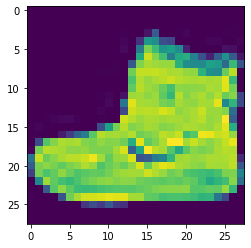

In [14]:
plt.imshow(train_images[0])

In [28]:
plt.colorbar()

RuntimeError: No mappable was found to use for colorbar creation. First define a mappable such as an image (with imshow) or a contour set (with contourf).

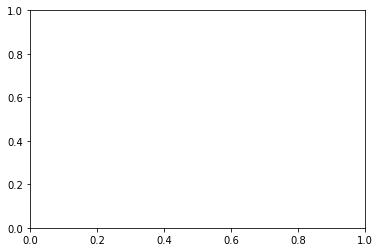

In [29]:
plt.grid(False)

In [30]:
plt.show()

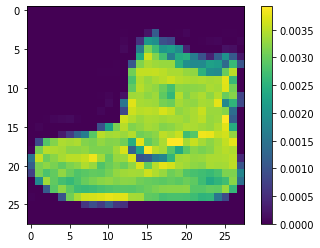

In [32]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

In [33]:
train_images = train_images / 255.0
test_images = test_images / 255.0

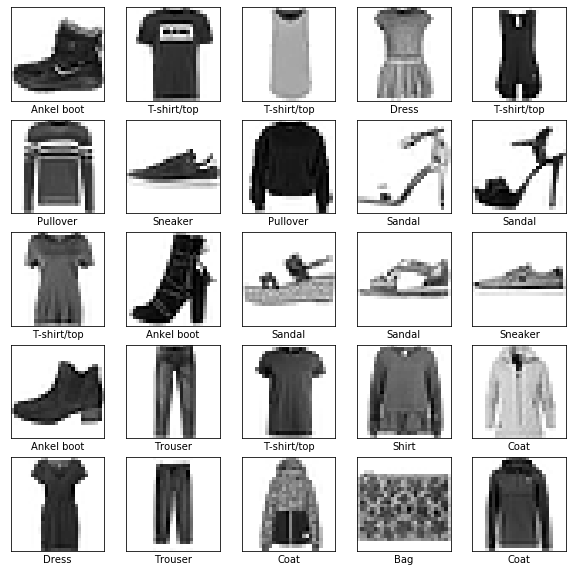

In [34]:
plt.figure(figsize = (10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

In [36]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

In [37]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'] )

In [38]:
model.fit(train_images, train_labels, epochs=10)

Train on 60000 samples
Epoch 1/10
60000/60000 [==============================] - 3s 56us/sample - loss: 2.3027 - accuracy: 0.0971
Epoch 2/10
60000/60000 [==============================] - 3s 50us/sample - loss: 2.3016 - accuracy: 0.1149
Epoch 3/10
60000/60000 [==============================] - 3s 47us/sample - loss: 2.2976 - accuracy: 0.1295
Epoch 4/10
60000/60000 [==============================] - 3s 48us/sample - loss: 2.2888 - accuracy: 0.1651
Epoch 5/10
60000/60000 [==============================] - 3s 48us/sample - loss: 2.2750 - accuracy: 0.1908
Epoch 6/10
60000/60000 [==============================] - 3s 47us/sample - loss: 2.2567 - accuracy: 0.2006
Epoch 7/10
60000/60000 [==============================] - 3s 51us/sample - loss: 2.2347 - accuracy: 0.2020
Epoch 8/10
60000/60000 [==============================] - 3s 48us/sample - loss: 2.2097 - accuracy: 0.2018
Epoch 9/10
60000/60000 [==============================] - 3s 48us/sample - loss: 2.1825 - accuracy: 0.2020
Epoch 10/10
60

In [39]:
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)
print('\nTest accuracy:', test_acc)

10000/1 - 0s - loss: 2.1398 - accuracy: 0.1919

Test accuracy: 0.1919


In [40]:
predictions = model.predict(test_images)

In [41]:
predictions[0]

array([0.06262183, 0.06756091, 0.08359595, 0.06711391, 0.07722607,
       0.14327565, 0.08001949, 0.14643726, 0.12724982, 0.14489919],
      dtype=float32)

In [42]:
np.argmax(predictions[0])

7

In [43]:
test_labels[0]

9

In [44]:
def plot_image(i, predictions_array, true_label, img):
    predictions_array, true_label, img = predictions_array, true_label[i], img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])

    plt.imshow(img, cmap=plt.cm.binary)

    predicted_label = np.argmax(predictions_array)
    if predicted_label == true_label:
        color = 'blue'
    else:
        color = 'red'
    
    plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],100*np.max(predictions_array), class_names[true_label]), color=color)

def plot_value_array(i, predictions_array, true_label):
    predictions_array, true_label = predictions_array, true_label[i]
    plt.grid(False)
    plt.xticks(range(10))
    plt.yticks([])
    thisplot = plt.bar(range(10), predictions_array, color="#777777")
    plt.ylim([0,1])
    predicted_label = np.argmax(predictions_array)

    thisplot[predicted_label].set_color('red')
    thisplot[true_label].set_color('blue')

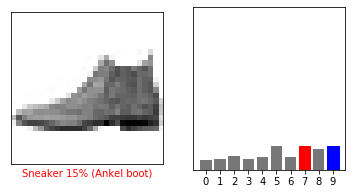

In [46]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i], test_labels)
plt.show()

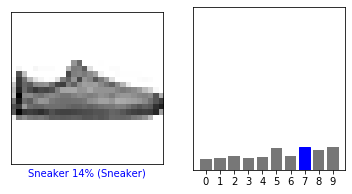

In [47]:
i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i], test_labels)
plt.show()

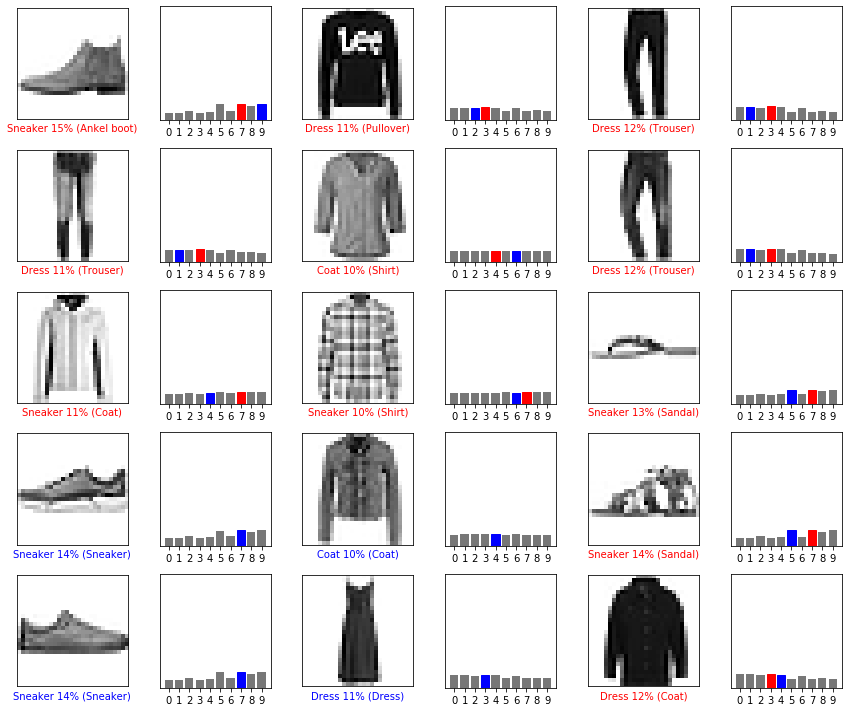

In [49]:
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
    plt.subplot(num_rows, 2*num_cols, 2*i+1)
    plot_image(i, predictions[i], test_labels, test_images)
    plt.subplot(num_rows, 2*num_cols, 2*i+2)
    plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()

In [52]:
img = test_images[1]
print(img.shape)

(28, 28)


In [53]:
img = (np.expand_dims(img,0))
print(img.shape)

(1, 28, 28)


In [54]:
predictions_single = model.predict(img)
print(predictions_single)

[[0.11118585 0.11323077 0.10644329 0.11366212 0.1100252  0.08389012
  0.10534929 0.08423483 0.08894447 0.08303405]]


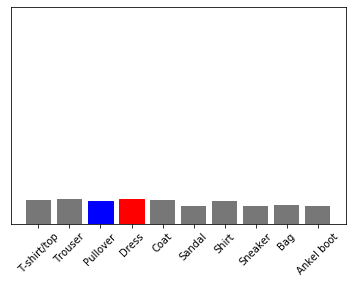

In [56]:
plot_value_array(1, predictions_single[0], test_labels)
_ = plt.xticks(range(10), class_names, rotation=45)

In [57]:
np.argmax(predictions_single[0])

3